## Latar Belakang

### Tentang Transjakarta
TransJakarta merupakan sebuah perusahaan yang bergerak di jasa transportasi yang sudah beroperasi sejak tahun 2004 di Indonesia. Perusahaan ini dirancang sebagai moda transportasi massal pendukung aktivitas ibu kota yang sangat padat. Saat ini TransJakarta memiliki 252 halte yang tersebar dalam 14 koridor dan beroperasi 24 jam

### Context - Audience
Disini audience yang diharapkan adalah manajemen TransJakarta

### Business Problem
Bagaimana Perusahaan terus dapat meningkatkan service level terhadap pelanggan TransJakarta untuk dapat mengingkatkan pendapatan Perusahaan serta pelayanan terhadap pelanggan

### Goals
Perusahaan ingin meningkatkan service level terhadap pelanggan TransJakarta, baik dari sisi peningkatan layanan armada, peningkatan layanan infrastruktur pada halte-halte yang ada, meningkatkan keamanan perjalanan, ataupun penambahan rute/koridor perjalanan untuk menampung kapasitas penumpang dan meningkatkan tingkat kepuasan pelanggan terhadap TransJakarta.


## Pernyataan Masalah
Berdasarkan Latar Belakang di atas, sebagai seorang *data analyst* kita akan mencoba membantu Perusahaan untuk mengetahui informasi yang bisa digunakan oleh Perusahaan untuk dapat menjawab *business problem* yang ada di atas guna pengambilan keputusan kedepan berdasarkan dataset yang kita punya, maka kita akan mencoba menjawab beberapa *business question* :

1. Koridor mana saja yang menjadi koridor dengan tingkat transaksi tertinggi?
2. Koridor mana saja yang menjadi koridor dengan tingkat transaki terendah?
3. Halte mana saja yang paling sering digunakan oleh pelanggan TransJakarta sebagai tempat Tap In dan Tap Out?
4. Kapan waktu terpadat penggunan TrasnJakarta?
5. Kapan waktu terlowong penggunaan TransJakarta?
6. Siapa yang paling banyak menggunakan TransJakarta ? (by gender dan by usia)



## Dataset
Dataset yang kita gunakan berisi 22 kolom yang teridiri dari:
1.	transID: Unique transaction id for every transaction
2.	payCardID: Customers main identifier. The card customers use as a ticket for entrance and exit.
3.	payCardBank: Customers card bank issuer name
4.	payCardName: Customers name that is embedded in the card.
5.	payCardSex: Customers sex that is embedded in the card
6.	payCardBirthDate: Customers birth year
7.	corridorID: Corridor ID / Route ID as key for route grouping.
8.	corridorName: Corridor Name / Route Name contains Start and Finish for each route.
9.	direction: 0 for Go, 1 for Back. Direction of the route.
10.	tapInStops: Tap In (entrance) Stops ID for identifying stops name
11.	tapInStopsName: Tap In (entrance) Stops Name where customers tap in.
12.	tapInStopsLat: Latitude of Tap In Stops
13.	tapInStopsLon: Longitude of Tap In Stops
14.	stopStartSeq: Sequence of the stops, 1st stop, 2nd stops etc. Related to direction.
15.	tapInTime: Time of tap in. Date and time
16.	tapOutStops: Tap Out (Exit) Stops ID for identifying stops name
17.	tapOutStopsName: Tap out (exit) Stops Name where customers tap out.
18.	tapOutStopsLat: Latitude of Tap Out Stops
19.	tapOutStopsLon: Longitude of Tap Out Stops
20.	stopEndSeq: Sequence of the stops, 1st stop, 2nd stops etc. Related to direction.
21.	tapOutTime: Time of tap out. Date and time
22.	payAmount: The number of what customers pay. Some are free. Some not.


## Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")


In [3]:
import os

file_path = 'D:/Capstone2/Transjakarta.csv'
df = pd.read_csv(file_path)
display(df.head(),df.tail())

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0
37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,P00001,...,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0


## Data Understanding and Cleaning

Proses Data Understanding dan Cleaning merupakan tahap awal dalam pengolahan data yang bertujuan untuk memahami karakteristik dan kualitas data yang dimiliki, serta membersihkannya dari potensi kesalahan atau kekurangan. Langkah-langkah ini sangat penting untuk memastikan data yang digunakan dalam analisis atau model memiliki kualitas yang baik dan dapat diandalkan.

Sebelum melakukan analisa, kita ingin melihat anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*.


In [4]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (37900, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-nul

In [282]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
transID,37900,37900,EIIW227B8L34VB,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payCardID,37900.0,NaN,NaN,NaN,425006029854231744.0,1321698663895501824.0,60403675436.0,180044239953466.0,3507946556271373.0,4699023220672919.0,4997693930906134528.0
payCardBank,37900,6,dki,18743,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payCardName,37900,1993,Fathonah Saefullah,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payCardSex,37900,2,F,20157,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payCardBirthDate,37900.0,NaN,NaN,NaN,1990.089314,13.051482,1946.0,1982.0,1990.0,2001.0,2012.0
corridorID,36643,221,1T,400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
corridorName,35970,216,Cibubur - Balai Kota,391,NaN,NaN,NaN,NaN,NaN,NaN,NaN
direction,37900.0,NaN,NaN,NaN,0.500633,0.500006,0.0,0.0,1.0,1.0,1.0
tapInStops,36687,2570,P00170,236,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [283]:
display(df.describe(), df.describe(include='object'))

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,EIIW227B8L34VB,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-25 06:23:00,P00016,BKN,2023-04-10 19:10:15
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


In [284]:
# menampilkan jumlah unik dan unique values untuk setiap kolom
pd.set_option('display.max_colwidth', None)
# data unik di tiap kolom
listItem = []
for col in df :
    listItem.append( [col, df[col].nunique(), df.sort_values(col)[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Values'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Values
0,transID,37900,"[AAAB241Q2R43WX, AAAG491F4U05HS, AAAT556I9Y53OO, AACO541N0A39UF, AACU637E4F11IF, AADA789U1D21DU, AADS567N5H73CF, AADT596Y5S36RD, AADW349U3P61AF, AADY796V9K17FV, AADZ829J1A91AD, AAEB470N5V01SQ, AAEF231Y0J60PI, AAEU515S0W17DE, AAEX920K5M81GF, AAGB155U3G40TA, AAGH471T9K45QM, AAGK545G8X28NP, AAHF378I1J30GI, AAHM166X5E83MK, AAIR727A0N19VX, AAIS645G3L86HF, AAJC499T1A37TI, AAJV713W9C06AH, AAKG386A0J86WO, AAKV602Q8L51OI, AALB293Y2D55RO, AALD709S7H04CR, AALT724O0P29RE, AAMG292E1X49NY, AAMJ894X4E82NS, AAMQ409Y7G10DQ, AAMR778S2L06HY, AAOT965K7E30DG, AAQL764Q0T01QB, AAQT144S1I29YY, AARA919S2X15VU, AARE347I6A03HC, AARN930Y0G21MI, AARQ968Z5D96OB, AASV643S7Q46RC, AATT251W1Z62KT, AATU796L5V72EP, AAUQ896J7T61FI, AAUR558S9B87ZH, AAUX387S2Q54ZT, AAVK200J5M96XF, AAVR178K5W03BY, AAXI397O9U94YY, AAXL965W0O84WH, AAXO539K2Q70LA, AAYL226Q2X78WT, AAYN415T4C43NH, AAZO671F4P90UD, AAZS226E7T49LG, ABAF363V5R11YK, ABAL072A6G10NW, ABAL505F7M16HH, ABAR096J1E28SE, ABBM765C2F77OE, ABBN869O7I93AW, ABBT992B9E54CO, ABCC851P3R17SM, ABDC755N0A09KN, ABDF527R0I45QK, ABDR391D1S97IA, ABDV632M5N59MI, ABEO039D6V77VS, ABEO197U1G80UU, ABFG546B7B25RT, ABFK412M2W34EI, ABFM278K9B12ZR, ABFY648S5D47AJ, ABGH469B5X10AB, ABGR958C2F58EI, ABHP401N9N63RN, ABHU295W8Y93OR, ABHZ793E1H46YW, ABID643H0D44YU, ABIH126H4R25DU, ABIO281W3E03KX, ABIS016B2A51RV, ABIS429K1B27PC, ABJD786V1R52GC, ABJP207Y7I11VQ, ABLU419U8Q55MG, ABMS715B3Q54KC, ABMT425D6Z06BI, ABNJ350N0L33MW, ABOC313C2X52OJ, ABOJ424H6S00TO, ABPH827P4B65JX, ABPS072U1Z44PL, ABQT737P8C12ON, ABQZ914O4R29SA, ABRG203B8J19KI, ABRK054G3O81PV, ABRR344Y8S70RD, ABSC912Y8F33CV, ABSQ173O0S15GE, ...]"
1,payCardID,2000,"[60403675436, 60404498697, 60417020934, 60421208343, 60427539402, 60438823183, 60459139923, 60477173011, 501826306422, 501828129459, 501829329314, 501830527583, 501834837947, 501835583250, 501843492007, 501844964426, 501862539795, 501879923123, 501898786352, 502001656953, 502010098205, 502018648266, 502034641014, 502041776746, 502056340149, 502057680857, 502060771669, 502072062834, 502079867680, 502084785232, 502085435639, 502098244101, 503808358074, 503808820412, 503811010654, 503815656676, 503816903945, 503835633655, 503837878738, 503841011862, 503841650990, 503850400063, 503859106877, 503861527151, 503867890736, 503873796075, 503882172573, 560124338883, 560633309896, 561500422432, 563170787110, 564493024850, 564770692288, 564779969448, 564804206261, 565431772831, 565511286645, 565845480021, 565988717981, 566171543168, 566942923723, 567048101008, 567169910336, 567286069354, 567328477953, 568339050417, 569536767183, 570918242399, 570928206772, 571548857234, 571979859337, 572311836488, 572544509597, 572846044996, 573673840092, 573891473155, 573942256138, 574726750023, 574887290025, 575273480229, 575724437786, 576927814706, 577158629979, 578253836568, 579114498853, 579559716439, 580165317646, 580183341537, 581570008267, 584795923666, 585314901299, 586670325479, 586818272435, 587526878497, 587537853984, 587887634588, 587942434511, 588376777318, 589057391023, 630411801479, ...]"
2,payCardBank,6,"[bni, brizzi, dki, emoney, flazz, online]"
3,payCardName,1993,"[Abyasa Haryanti, Ade Astuti, Ade Halimah, Ade Suryono, Ade Waluyo, Adhiarja Lazuardi, Adhiarja Wahyudin, Adhiarja Winarsih, Adiarja Waluyo, Adika Kusumo, S.H., Adika Pudjiastuti, Adikara Kurniawan, S.Sos, Adikara Megantara, Adinata Damanik, Agnes Hidayanto, M.Farm, Agnes Oktaviani, Agus Siregar, Agus Utami, Aisyah Budiman, Aisyah Nasyidah, Ajeng Halim, Ajeng Pradipta, Ajeng Santoso, Ajimat Pradana, Ajimat Rahmawati, Ajiono Budiyanto, S.I.Kom, Ajiono Lazuardi, Ajiono Natsir, Ajiono Prasetya, Akarsana Nurdiyanti, M.Farm, Alambana Sinaga, Alika Hakim, S.I.Kom, Alika Halimah, Alika Hutasoit, S.Gz, Alika Waskita, Almira Lestari, Almira Wastuti, Amalia Winarno, Amelia Ardianto, Amelia Nasyidah, Amelia Wibisono, Ami Hutagalung, Ami Iswahyudi, Ami Thamrin, Ami Uyainah, Among Wahyudin, Among Zulaika, S.Gz, Ana Agustina, Ana Anggrai

### Duplicate Data

In [289]:
#melihat apakah ada data duplikasi
df.duplicated().sum()

0

Tidak terdapat duplicate data


### Missing Value

In [5]:
#cek missing value
df.isnull()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
37896,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
37897,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
37898,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Berdasarkan output diatas, jika hasil output tertulis False, hal tersebut memberikan arti bahwa kolom tersebut tidak mengandung Missing Values dan dapat disimpulkan bahwa kolom-kolom yang mengandung Missing Values adalah kolom yang bernilai True


In [291]:
# analisa missing value
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

In [6]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

transID             0.000000
payCardID           0.000000
payCardBank         0.000000
payCardName         0.000000
payCardSex          0.000000
payCardBirthDate    0.000000
corridorID          3.316623
corridorName        5.092348
direction           0.000000
tapInStops          3.200528
tapInStopsName      0.000000
tapInStopsLat       0.000000
tapInStopsLon       0.000000
stopStartSeq        0.000000
tapInTime           0.000000
tapOutStops         6.039578
tapOutStopsName     3.546174
tapOutStopsLat      3.546174
tapOutStopsLon      3.546174
stopEndSeq          3.546174
tapOutTime          3.546174
payAmount           2.656992
dtype: float64

Berdasarkan output diatas, terdapat *missing values* pada beberapa kolom diantaranya: `corridorID` , `corridorName`, `tapInStops`, `tapOutStops`, `tapOutTime`, dan lainnya


<Axes: >

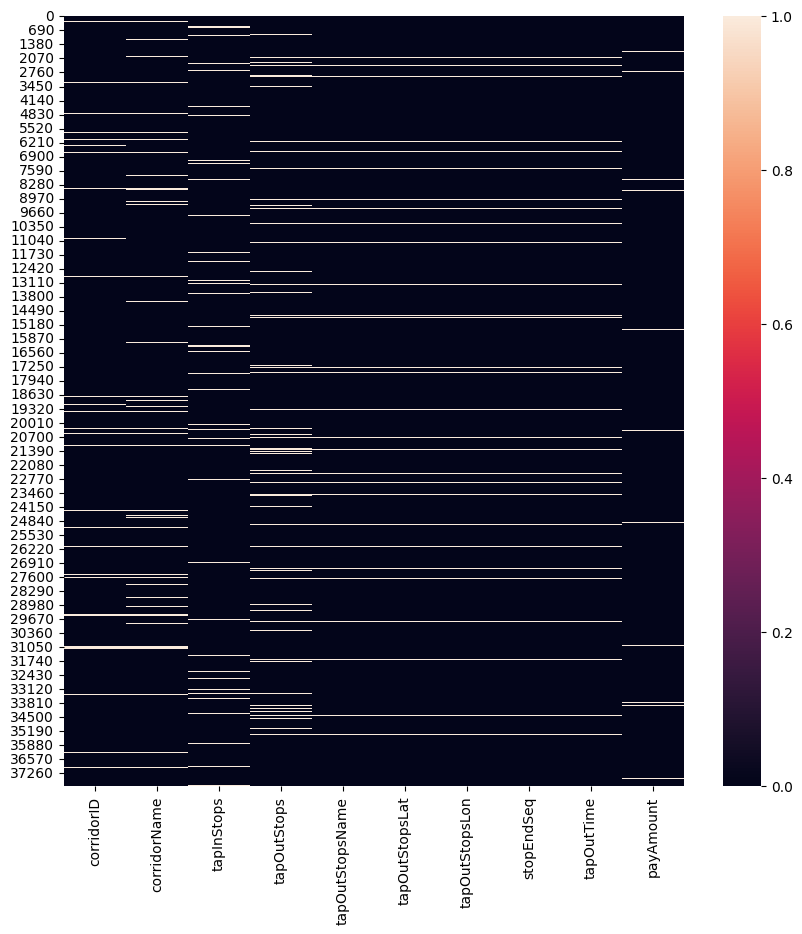

In [7]:
# melihat sebaran missing value
plt.figure(figsize=(10,10))
sns.heatmap(df[['corridorID','corridorName','tapInStops','tapOutStops','tapOutStopsName','tapOutStopsLat','tapOutStopsLon','stopEndSeq','tapOutTime','payAmount']].isna())

Secara umum, kita bisa melihat bahwa:

* Dataset yang kita gunakan memiliki 22 kolom dan 37900 baris
* Beberapa kolom seperti`corridorID`, `corridorName`, `tapInStops`, `tapOutstops`, `tapOutStopsName`, `tapOutStopsLat`,`tapOutStopsLon`, `StopEndSeq`, `tapOutTime` dan `payAmount`memiliki *missing value* yang diwakili dengan data blank / NaN.
* Ada 2 cara untuk menangani *missing value* yaitu dengan menghapus baris/kolom yang berisi *missing value* atau mengisi data yang hilang.

* Kalau kita lihat *missing value* di kolom `corridorID` dan `corridorName` memiliki sebaran yang berkaitan, jika data di `corridorID` kosong, maka kemungkinan besar data di `corridorName` juga kosong, begitu juga sebaliknya.maka dari itu kita bisa meminimalisir *missing value* yang ada, karena salah satu cara untuk mengatasi data missing adalah dengan menghapus atau mengisi nya dengan data yang serupa. Jika untuk kolom `corridorID` dan `corridorName` kita hapus baris yang kosong, maka kita akan kehilangan beberapa data yang sebenernya bisa kita isi, maka dari itu kita akan coba mengisi data kosong di  kolom `corridorID` dan `corridorName`.
* Begitu juga  *missing value* di kolom `tapOutTime` juga memiliki sebaran yang berkaitan dengan `tapOutstops`, `tapOutStopsName`, `tapOutStopsLat`,`tapOutStopsLon`, disini ada insight yang bisa disampaikan bahwa terdapat penumpang yang tidak melakukan "TAP OUT" saat keluar di halte atau penumpang tersebut melakukan transit koridor dan melakukan "TAP OUT" di dalam Bus Transjakarta di halte pengumpan. Jika kita lihat persentase *missing value* yang ada sekitar 3-6%  masih berada di bawah 10 persen (<10%), jadi kita bisa menggunakan opsi hapus data.


Disini sebelum saya melakukan pengisian data pada kolom `corridorID` dan `corridorName`, saya ingin melihat juga apakah dengan kita mengisi atau menghapus mempengaruhi hasil analisa atau tidak

In [8]:
# sebagai contoh saya akan coba melakukan analisa data melihat corridor mana yang memiliki jumlah perjalanan terbanyak:
df.value_counts(['corridorName']).head(10)

corridorName                               
Cibubur - Balai Kota                           391
Ciputat - CSW                                  383
Pulo Gadung - Monas                            343
Harmoni - Jakarta International Stadium        338
Kebayoran Lama - Tanah Abang                   333
Kalideres - Bundaran HI via Veteran            332
Kampung Rambutan - Pondok Gede                 329
Rusun Pondok Bambu - Walikota Jakarta Timur    326
Rusun Rawa Bebek - Kodamar                     312
Pasar Minggu - Tanah Abang                     303
Name: count, dtype: int64

Dari analisis data di atas, kita sudah bisa melihat top 10 corridorName terbanyak dimana koridor Cibubur - Balai Kota ; Ciputat - CSW ; Pulogadung - Monas ; Harmoni - Jakarta International Stadium ; Kebayoran Lama - Tanah Abang dan seterusnya merupakan yang terbanyak.

Kita sudah melihat gambaran kasar sebaran di dalam data kita, sekarang, mari kita coba untuk melakukan penanganan missing value dengan melakukan pengisian  

Dari analisis yang sudah kita lakukan sebelumnya, kita melihat *missing value* `corridorID` dan `corridorName` saling berkaitan. Maka, kita akan coba melakukan pengisian pada *missing value* di kolom tersebut.

In [9]:
df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


Membuat subset columns dan melihat missing values pada kedua kolom tersebut:

In [10]:
# membuat subset columns
df2 = df.iloc[:,6:8]

# mengecek jumlah missing values
df2.isna().sum()

corridorID      1257
corridorName    1930
dtype: int64

Membuat Dictionary sebagai refrensi

In [11]:
# Drop missing values
df3 = df2.drop_duplicates().dropna()

# membuat dictionary dari df3
dict1 = df3.to_dict()
dict1

{'corridorID': {0: '5',
  1: '6C',
  2: 'R1A',
  3: '11D',
  4: '12',
  5: '1T',
  6: 'JAK.18',
  8: 'B14',
  9: '1Q',
  10: '5M',
  11: 'M7B',
  12: '9A',
  13: '4',
  14: 'JAK.46',
  15: 'S22',
  16: '13',
  17: '9E',
  18: 'M9',
  19: 'JAK.88',
  20: 'T11',
  21: 'JAK.16',
  22: '6V',
  23: '11Q',
  24: 'JAK.02',
  25: '11',
  26: '1C',
  27: '3B',
  29: 'M1',
  31: '7E',
  32: '1P',
  33: '7D',
  34: '6H',
  35: '14',
  36: 'BW9',
  37: 'JIS3',
  40: 'JAK.15',
  42: '6N',
  43: 'M11',
  44: 'JAK.112',
  45: '9N',
  46: 'JAK.43B',
  47: 'JAK.42',
  48: '2',
  50: '7P',
  53: 'JAK.36',
  54: '13B',
  56: 'JAK.06',
  57: 'JAK.14',
  58: 'M7',
  62: '9D',
  63: '1',
  64: '3A',
  66: '3C',
  67: 'M8',
  68: 'B21',
  69: '12A',
  71: 'JAK.71',
  72: 'JAK.77',
  74: 'JAK.44',
  76: 'JAK.48B',
  77: '8K',
  78: 'JAK.19',
  79: 'M10',
  80: '10D',
  81: 'JAK.75',
  82: 'B11',
  83: 'JAK.52',
  84: 'JAK.37',
  85: 'JAK.31',
  86: '11M',
  87: 'JAK.43C',
  88: '2F',
  91: '8C',
  92: 'M2',
 

In [12]:
# membuat list untuk memisahkan values
list1 = list(dict1['corridorID'].values())
list2 = list(dict1['corridorName'].values())

# membuat dictionary baru dengan key:pair value
dictnew = {}

for i in range(len(list1)):
    dictnew[list1[i]] = list2[i]

Mengisi *missing value* pada `corridorName` dengan menggunakan dictionary sebagai refrensi:

In [13]:
# Fill the 'corridorName' columns first using Dictionary as Reference
for i in range(len(df)):
    if pd.isna(df['corridorName'][i]) == True:
        try:
            df.at[i,'corridorName'] = list2[list1.index(df['corridorID'][i])]
        except:
            pass

df[['corridorID','corridorName']].isna().sum()

corridorID      1257
corridorName    1125
dtype: int64

Mengisi *missing value* pada `corridorID` dengan menggunakan dictionary sebagai refrensi:

In [14]:
# then, Fill the 'corridorID' column using Dictionary as Reference
for i in range(len(df)):
    if pd.isna(df['corridorID'][i]) == True:
        try:
            df.at[i,'corridorID'] = list1[list2.index(df['corridorName'][i])]
        except:
            pass

df[['corridorID','corridorName']].isna().sum()

corridorID      1125
corridorName    1125
dtype: int64

Setelah kita lakukan data cleansing saat ini jadi terdapat data jumlah *missing value* pada `corridorID` dan `corridorName` yang sama, artinya saat ini setiap data kosong pada kolom `corridorID` begitu juga pada kolom `corridorName` yaitu sebanyak 1125.

Sekarang coba kita lakukan analisa sama seperti sebelumnya untuk melihat corridor mana yang memiliki jumlah perjalanan terbanyak:

In [15]:
df.value_counts(['corridorName']).head(10)

corridorName                               
Cibubur - Balai Kota                           400
Ciputat - CSW                                  388
Pulo Gadung - Monas                            349
Harmoni - Jakarta International Stadium        342
Kebayoran Lama - Tanah Abang                   339
Kalideres - Bundaran HI via Veteran            336
Kampung Rambutan - Pondok Gede                 333
Rusun Pondok Bambu - Walikota Jakarta Timur    332
Rusun Rawa Bebek - Kodamar                     318
Pasar Minggu - Tanah Abang                     313
Name: count, dtype: int64

Dari analisis data di atas, kita lihat untuk hasilnya masih sama dengan data yang di atas untuk corridorName terbanyak dimana, koridor Cibubur - Balai Kota ; Ciputat - CSW ; Pulogadung - Monas ; Harmoni - Jakarta International Stadium ; Kebayoran Lama - Tanah Abang dan seterusnya. 


Sekarang, kita coba melakukan analisa untuk kolom  `tapOutTime` dan `tapOutStops` juga memiliki sebaran yang berkaitan:

Pertama, mari kita cek kolom `tapOutStops` dengan data `tapOutTime` yang kosong.

In [302]:
display(df[df['tapOutTime'].isna()]['tapOutStops'].value_counts())

Series([], Name: count, dtype: int64)

Bisa dilihat bahwa apabila data `tapOutTime` kosong, pasti kolom `tapOutStops` juga kosong

Kedua, mari kita balik cek kolom `tapOutTime` dengan data `tapOutStops` yang kosong.

In [16]:
display(df[df['tapOutStops'].isna()]['tapOutTime'].value_counts())

tapOutTime
2023-04-19 17:43:29    2
2023-04-03 06:52:14    1
2023-04-20 19:48:29    1
2023-04-20 09:33:40    1
2023-04-20 10:19:16    1
                      ..
2023-04-03 09:01:02    1
2023-04-03 08:52:44    1
2023-04-03 09:24:40    1
2023-04-03 09:26:14    1
2023-04-30 09:10:03    1
Name: count, Length: 944, dtype: int64

Selanjutnya saya coba melihat data di kolom `tapOutStops` yang kosong dengan melihat kolom `tapOutStopsName`

In [17]:
display(df[df['tapOutStops'].isna()]['tapOutStopsName'].value_counts())

tapOutStopsName
BKN                           10
Penjaringan                   10
Term. Senen                    7
Pluit                          7
Rusun Kapuk Muara              6
                              ..
Sbr. SMPN 48                   1
Cawang Soetoyo 1               1
IRTI                           1
Jln. Rorotan XI                1
Gg. Trijaya IV Tebet Timur     1
Name: count, Length: 599, dtype: int64

Bisa kita lihat bahwa pada urutan tiga teratas terdapat jumlah *missing value* pada halte BKN sebanyak 10, Penjaringan sebanyak 10, kemudian Term.Senen sebanyak 7, dst.

Selanjutnya saya coba melihat urutan top 10 untuk data 'tapOutStopsName' terbanyak terlebih dahulu, untuk melihat apabila kita mau menghapus *missing value* akan berdampak pada analisa kita atau tidak nantinya:

In [18]:
df.value_counts(['tapOutStopsName']).head(10)


tapOutStopsName       
BKN                       316
Penjaringan               265
Term. Senen               196
Monas                     167
Term. Kampung Rambutan    164
Kejaksaan Agung           159
Ragunan                   151
Pinang Ranti              146
Tendean                   131
Kota Kasablanka           131
Name: count, dtype: int64

Bisa kita lihat bahwa BKN, Penjaringan, dan Term. Senen menjadi tiga urutan terbanyak.

Sebelumnya di atas kita sudah melihat seberapa banyak *missing value* yang ada pada halte BKN, Penjaringan, dan Term. Senen dan apabila kita hapus *missing value* tetap tidak akan berdampak pada urutan terbanyak yang ada.

Dari analisis data di atas, dapat diputuskan memang dikarenakan *missing value* yang ada memiliki persentase yang hanya 3-6% dan tidak terlalu signifikan, maka kita bisa coba menghapus data *missing value* yang ada. selain itu kolom - kolom yang ada tersebar pada kategori values dan tidak berada pada satu kategori saja.

Selanjutnya, kita akan melanjutkan cleansing data dengan mengahapus data  *missing values* yang ada karena tidak akan menganggu analisa yang dilakukan selanjutnya.

In [19]:
df = df.dropna(axis=0)
df.isna().sum()

transID             0
payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStops          0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
dtype: int64

In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 32555 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           32555 non-null  object 
 1   payCardID         32555 non-null  int64  
 2   payCardBank       32555 non-null  object 
 3   payCardName       32555 non-null  object 
 4   payCardSex        32555 non-null  object 
 5   payCardBirthDate  32555 non-null  int64  
 6   corridorID        32555 non-null  object 
 7   corridorName      32555 non-null  object 
 8   direction         32555 non-null  float64
 9   tapInStops        32555 non-null  object 
 10  tapInStopsName    32555 non-null  object 
 11  tapInStopsLat     32555 non-null  float64
 12  tapInStopsLon     32555 non-null  float64
 13  stopStartSeq      32555 non-null  int64  
 14  tapInTime         32555 non-null  object 
 15  tapOutStops       32555 non-null  object 
 16  tapOutStopsName   32555 non-null  object 
 17

In [21]:
df.isna().sum()

transID             0
payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStops          0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
dtype: int64

Sekarang kita memiliki jumlah 32555 rows dan 22 columns setelah kita menghapus *missing value*

Terakhir, sebelum kita memulai untuk melakukan Data Anlysis, kita akan merubah tipe data pada kolom `tapInTime` dan `tapOutTime` yang berupa object menjadi datetime.

### Data Outlier

Kita akan melihat dimasing-masing struktur data nya apa mempunyai data Outlier / atau data yang menyimpang dari sebaran data tersebut, dikarenakan sebelum melakukan analisa kita juga harus mengecek data tersebut menyebar normal atau tidak.

Selanjut nya, dari dataset tersebut, kita ingin mengecek data outlier `tapInStopsLat` dan `tapInStopsLon`, dikarenakan data tersebut merupakan data yang berkolerasi

Kita akan coba melihat data  `tapInStopsLat` dan `tapInStopsLon`

In [22]:
df.describe()

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.255500e+04,32555.000000,32555.000000,32555.000000,32555.000000,32555.000000,32555.000000,32555.000000,32555.000000,32555.000000
mean,4.197717e+17,1990.193857,0.500384,-6.214765,106.841831,13.614437,-6.214637,106.841581,21.311074,2723.606205
std,1.315105e+18,13.066053,0.500008,0.058475,0.061149,12.276359,0.059651,0.061833,13.900599,4254.492902
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800443e+14,1982.000000,0.000000,-6.245863,106.801940,4.000000,-6.248460,106.800940,11.000000,0.000000
50%,3.507251e+15,1991.000000,1.000000,-6.214145,106.835200,10.000000,-6.214423,106.834892,18.000000,3500.000000
75%,4.684821e+15,2001.000000,1.000000,-6.174903,106.883630,19.000000,-6.174207,106.884940,30.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


In [44]:
df.describe()['tapInStopsLat']


count    32555.000000
mean        -6.214765
std          0.058475
min         -6.394973
25%         -6.245863
50%         -6.214145
75%         -6.174903
max         -6.089429
Name: tapInStopsLat, dtype: float64

In [45]:
df.describe()['tapInStopsLon']

count    32555.000000
mean       106.841831
std          0.061149
min        106.614730
25%        106.801940
50%        106.835200
75%        106.883630
max        107.023950
Name: tapInStopsLon, dtype: float64

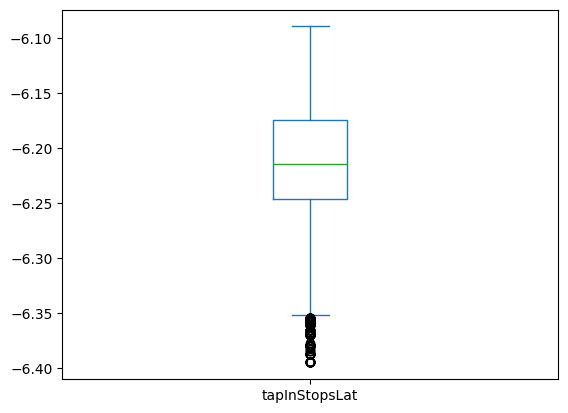

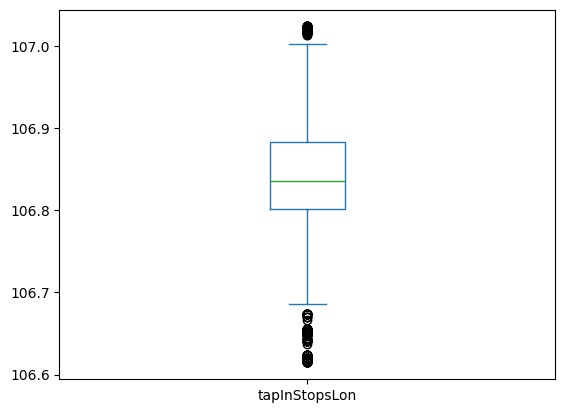

In [24]:
df['tapInStopsLat'].plot(kind='box')
plt.show()
df['tapInStopsLon'].plot(kind='box')
plt.show()

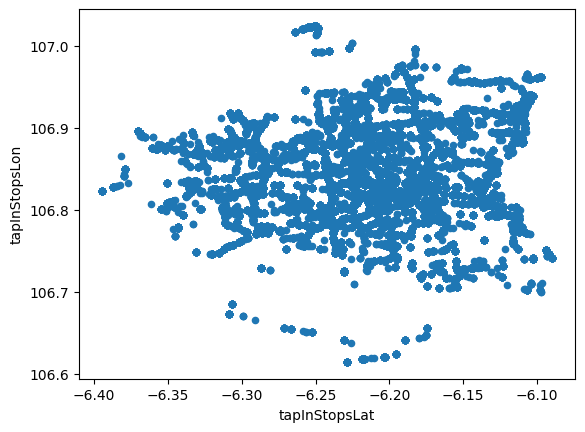

In [25]:
df.plot(kind='scatter',x='tapInStopsLat',y='tapInStopsLon')
plt.xlabel('tapInStopsLat')
plt.ylabel('tapInStopsLon')
plt.show()

In [26]:
#mencari nilai mean dan standar deviasi
mean1 = df['tapInStopsLat'].mean()
std1 = df['tapInStopsLat'].std()
mean2 = df['tapInStopsLon'].mean()
std2 = df['tapInStopsLon'].std()

In [27]:
limit_batas_lat = 3*std1
limit_batas_lon = 3*std2

In [28]:
batas_atas_lat = mean1 + 3*std1
batas_bawah_lat = mean1 - 3*std1

batas_atas_lon = mean2 + 3*std2
batas_bawah_lon = mean2 - 3*std2

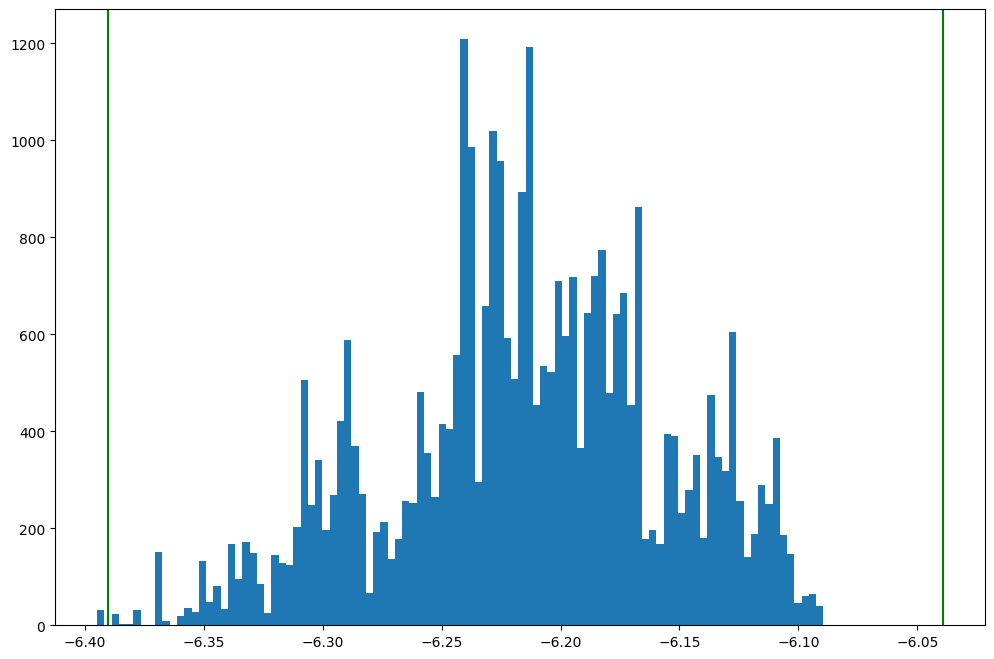

In [29]:
fig, ax = plt.subplots(figsize=(12,8))
ax.hist(df['tapInStopsLat'],bins=100)
ax.axvline(batas_atas_lat, color='g')
ax.axvline(batas_bawah_lat, color='g')
plt.show()

Dari hasil visualisasi di atas, pada Box Plot ada titik yang di luar kotak, untuk itu bisa kita simpulkan ada titik Lattitude dan Longitude yang diluar sebaran. Kemudian pada Scatter Plot yang dibuat saling berkolerasi, terlihat menyebar secara normal, namun jika diperhatikan detail ada data-data yang diluar sebaran normal yang jumlahnya tidak banyak

Sedangkan pada Histogram kita dapat melihat sebaran data terbanyak masih berada di range batas atas dan batas bawah.

Sekarang coba kita cek untuk kolom `payCardBirthDate` :

In [30]:
df.describe()['payCardBirthDate']

count    32555.000000
mean      1990.193857
std         13.066053
min       1946.000000
25%       1982.000000
50%       1991.000000
75%       2001.000000
max       2012.000000
Name: payCardBirthDate, dtype: float64

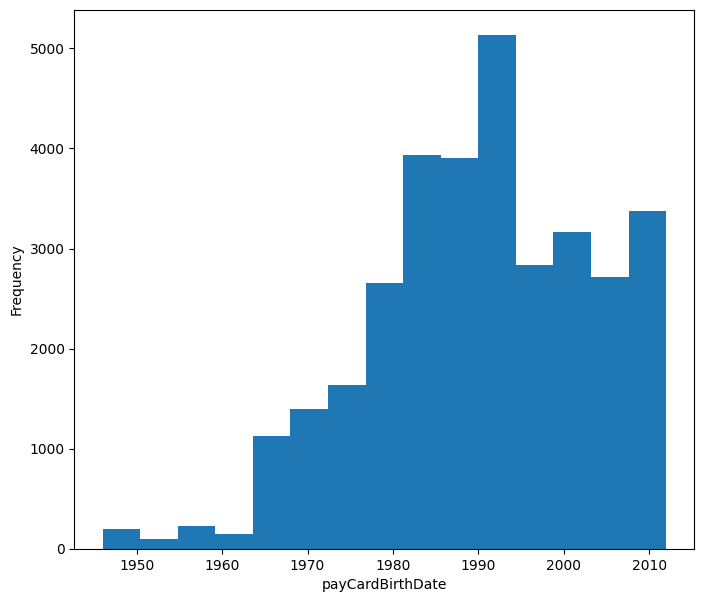

In [31]:
plt.figure(figsize=(8,7))
plt.hist(df['payCardBirthDate'], bins=15)
plt.xlabel("payCardBirthDate")
plt.ylabel("Frequency")
plt.show()

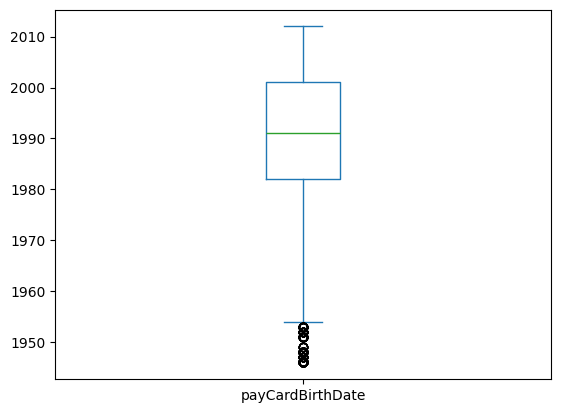

In [32]:
df['payCardBirthDate'].plot(kind='box')
plt.show()

In [333]:
mean1 = df['payCardBirthDate'].mean()
std1 = df['payCardBirthDate'].std()

In [33]:
limit_batas_pay = 3*std1

In [335]:
batas_atas_pay = mean1 + 3*std1
batas_bawah_pay = mean1 - 3*std1

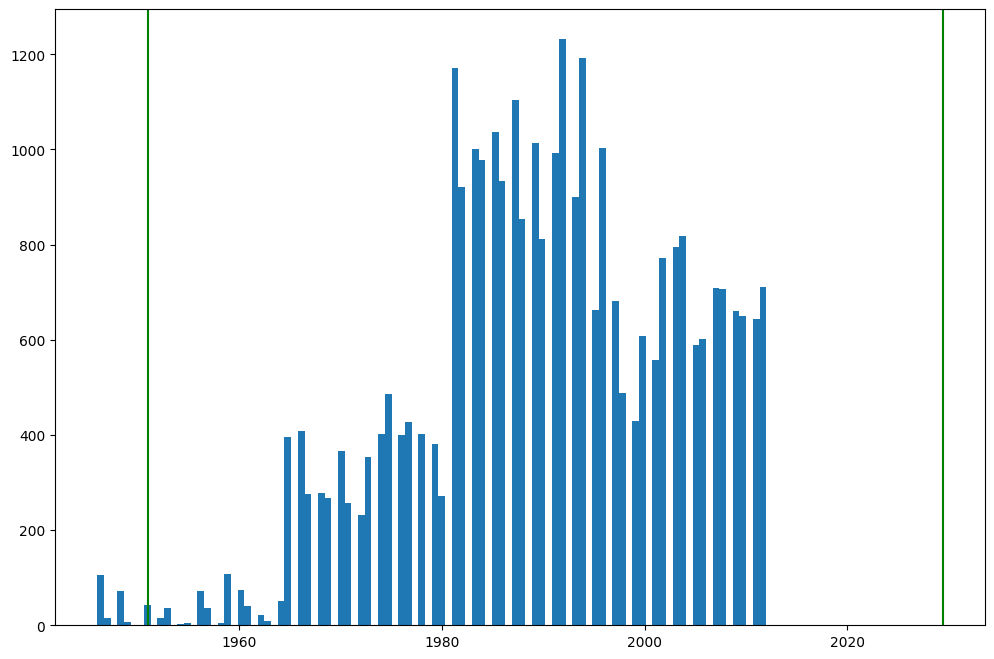

In [337]:
fig, ax = plt.subplots(figsize=(12,8))
ax.hist(df['payCardBirthDate'],bins=100)
ax.axvline(batas_atas_pay, color='g')
ax.axvline(batas_bawah_pay, color='g')
plt.show()

Dari data visualisasi grafik Box plot, Scatter Plot, maupun Histogram kita dapat kembali kita melihat sebaran data terbanyak masih berada di range batas atas dan batas bawah data yang kita miliki sehingga kita dapat melanjutkan analisa.


### Merubah tipe data

In [122]:
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32555 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           32555 non-null  object 
 1   payCardID         32555 non-null  int64  
 2   payCardBank       32555 non-null  object 
 3   payCardName       32555 non-null  object 
 4   payCardSex        32555 non-null  object 
 5   payCardBirthDate  32555 non-null  int64  
 6   corridorID        32555 non-null  object 
 7   corridorName      32555 non-null  object 
 8   direction         32555 non-null  float64
 9   tapInStops        32555 non-null  object 
 10  tapInStopsName    32555 non-null  object 
 11  tapInStopsLat     32555 non-null  float64
 12  tapInStopsLon     32555 non-null  float64
 13  stopStartSeq      32555 non-null  int64  
 14  tapInTime         32555 non-null  object 
 15  tapOutStops       32555 non-null  object 
 16  tapOutStopsName   32555 non-null  object 
 17

## Data yang sudah bersih
Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan

In [35]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)])

dfDesc = pd.DataFrame(columns=['Column Name', 'dataType', 'null', 'Unique', 'UniqueSample'],
                        data=listItem)
print(df.shape)
dfDesc  

(32555, 22)


,Column Name,dataType,null,Unique,UniqueSample
0,transID,object,0,32555,"[VUVC161V3E88BH, OZNH949H1H68DA]"
1,payCardID,int64,0,1931,"[4745660707486, 4577386103603]"
2,payCardBank,object,0,6,"[flazz, bni]"
3,payCardName,object,0,1924,"[Sutan Kadir Tamba, Jane Setiawan]"
4,payCardSex,object,0,2,"[F, M]"
5,payCardBirthDate,int64,0,66,"[1986, 1979]"
6,corridorID,object,0,216,"[JAK.61, 12F]"
7,corridorName,object,0,211,"[Depok - BKN, Kampung Melayu - Tanah Abang via..."
8,direction,float64,0,2,"[0.0, 1.0]"
9,tapInStops,object,0,2452,"[P00016, B03416P]"


## Data Analysis

Kita sudah melakukan tahap _data cleaning_. Sekarang, kita bisa mulai melakukan analisis data.  


#### 1. Koridor mana saja yang menjadi koridor dengan tingkat transaksi tertinggi dan terendah?


In [36]:
# Data perjalanan tertinggi

df.value_counts(['corridorName']).head(10)

corridorName                               
Cibubur - Balai Kota                           371
Ciputat - CSW                                  355
Harmoni - Jakarta International Stadium        318
Pulo Gadung - Monas                            317
Kampung Rambutan - Pondok Gede                 308
Kalideres - Bundaran HI via Veteran            304
Rusun Pondok Bambu - Walikota Jakarta Timur    303
Kebayoran Lama - Tanah Abang                   297
Rusun Rawa Bebek - Kodamar                     289
Pasar Minggu - Tanah Abang                     285
Name: count, dtype: int64

In [37]:
# Data perjalanan terendah

df.value_counts(['corridorName']).tail(10)

corridorName                                  
Rusun Pinus Elok - Rusun Pulo Gebang              52
St. LRT Pegangsaan Dua - JIS                      50
Stasiun Manggarai - Blok M                        49
Pondok Kelapa - BKN                               45
Grogol - Pos Pengumben via Slipi                  37
Gondangdia - Balai Kota                           37
Senen - Tanah Abang                               36
Term. Pulo Gadung - Lampiri                       28
Tanah Abang - Kebayoran Lama via Pos Pengumben    22
Kampung Rambutan - Blok M                         17
Name: count, dtype: int64


Dapat kita lihat dari hasil analisa di atas jumlah koridor mana saja yang memiliki perjalanan tertinggi dan terendah. Kemudian kita akan coba membuat visualisasi untuk jumlah koridor tertinggi:


[Text(0, 0, 'Cibubur - Balai Kota'),
 Text(1, 0, 'Ciputat - CSW'),
 Text(2, 0, 'Harmoni - Jakarta International Stadium'),
 Text(3, 0, 'Pulo Gadung - Monas'),
 Text(4, 0, 'Kampung Rambutan - Pondok Gede'),
 Text(5, 0, 'Kalideres - Bundaran HI via Veteran'),
 Text(6, 0, 'Rusun Pondok Bambu - Walikota Jakarta Timur'),
 Text(7, 0, 'Kebayoran Lama - Tanah Abang'),
 Text(8, 0, 'Rusun Rawa Bebek - Kodamar'),
 Text(9, 0, 'Pasar Minggu - Tanah Abang')]

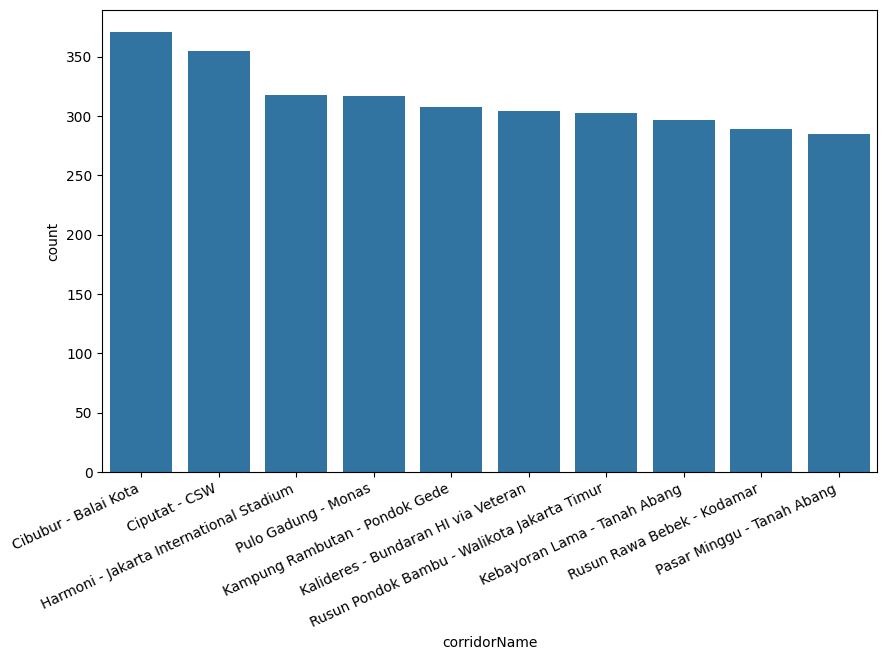

In [38]:
plt.figure(figsize=(10,6))
ax = sns.countplot(df,x='corridorName', order=df['corridorName'].value_counts().iloc[:10].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha="right")


Dari visualisasi diatas terlihat disini bahwa koridor yang tertinggi ada pada koridor Cibubur - Balai Kota dengan nilai 371 sedangkan untuk yang terendah ada pada Kampung Rambutan - Blok M dengan nilai 17. Hal ini bisa dikarenakan bahwa banyak orang yang kerja di Jakarta namun memiliki hunian di sekitaran Jakarta, seperti Cibubur. Banyak orang yang memanfaatkan moda transportasi TransJakarta sebagai sarana transportasi penunjang aktivitas mereka.

Insight:
- Armada pada koridor ini harus selalu prima agar tidak menghambat perjalanan TransJakrta dan tetap menjaga tingkat penggunaan oleh pelanggan. 
- Perusahaan juga bisa melakukan perencanan untuk jadwal perawatan berkala pada masing-masing koridor dengan melihat data di atas.


 

#### 2. Halte mana saja yang memiliki Tap In dan Tap Out tertinggi?

In [39]:
# TAP IN STOPS
df.value_counts(['tapInStopsName']).head(10)

tapInStopsName   
Penjaringan          213
Garuda Taman Mini    187
BKN                  152
BNN LRT              140
Pejaten              134
Penggilingan         119
Seskoal              115
Cibubur Junction     111
Rusun Kapuk Muara    110
Rawa Selatan         103
Name: count, dtype: int64

[Text(0, 0, 'Penjaringan'),
 Text(1, 0, 'Garuda Taman Mini'),
 Text(2, 0, 'BKN'),
 Text(3, 0, 'BNN LRT'),
 Text(4, 0, 'Pejaten'),
 Text(5, 0, 'Penggilingan'),
 Text(6, 0, 'Seskoal'),
 Text(7, 0, 'Cibubur Junction'),
 Text(8, 0, 'Rusun Kapuk Muara'),
 Text(9, 0, 'Rawa Selatan')]

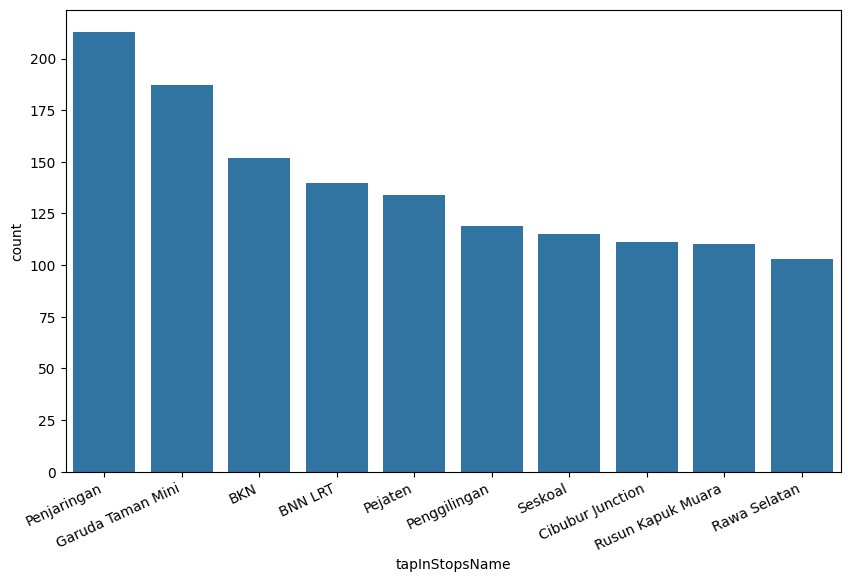

In [40]:
plt.figure(figsize=(10,6))
ax = sns.countplot(df,x='tapInStopsName', order=df['tapInStopsName'].value_counts().iloc[:10].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha="right")

In [41]:
#TAP OUT STOPS
df.value_counts(['tapOutStopsName']).head(10)

tapOutStopsName       
BKN                       284
Penjaringan               244
Term. Senen               177
Term. Kampung Rambutan    147
Monas                     146
Ragunan                   135
Pinang Ranti              133
Kejaksaan Agung           123
Jembatan Item             120
Cibubur Junction          120
Name: count, dtype: int64

[Text(0, 0, 'BKN'),
 Text(1, 0, 'Penjaringan'),
 Text(2, 0, 'Term. Senen'),
 Text(3, 0, 'Term. Kampung Rambutan'),
 Text(4, 0, 'Monas'),
 Text(5, 0, 'Ragunan'),
 Text(6, 0, 'Pinang Ranti'),
 Text(7, 0, 'Kejaksaan Agung'),
 Text(8, 0, 'Jembatan Item'),
 Text(9, 0, 'Cibubur Junction')]

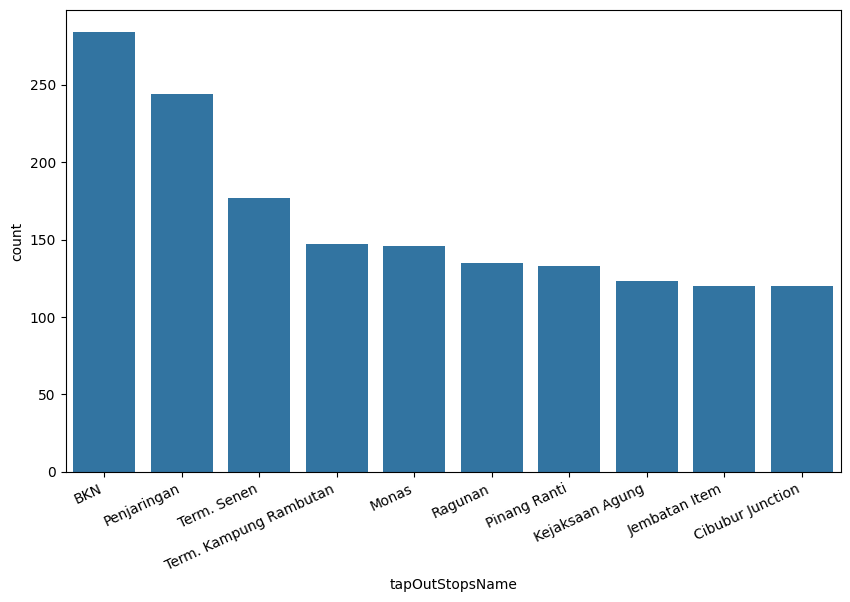

In [190]:
plt.figure(figsize=(10,6))
ax = sns.countplot(df,x='tapOutStopsName', order=df['tapOutStopsName'].value_counts().iloc[:10].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha="right")

Dari visualisasi diatas terlihat disini bahwa halte Penjaringan dan BKN merupakan yang tertinggi dilakukannya Tap In/Tap Out oleh penumpang.

Insight:
- Perusahaan harus meningkatkan pelayanan infrastruktur pada halte-halte tersebut, seperti mesin tap, monitor layar (untuk memantau kedatangan bus), tempat duduk untuk menunggu, dll.
- Tingkat kemanan juga harus ditingkatkan pada halte-halte yang memiliki intensitas penumpang yang tinggi ini.



#### 3. Kapan waktu terpadat dan terlowong penggunaan TransJakarta?

In [172]:
df['tapInHour'] = df['tapInTime'].dt.hour
df['tapOutHour'] = df['tapOutTime'].dt.hour
df['weekday'] = df['tapInTime'].dt.weekday

df['travelduration'] = df['tapOutTime'] - df['tapInTime']
df['travelduration'] = df['travelduration'].dt.total_seconds()/60

In [173]:
def tapGroup(data, by: str):
    res = data.groupby(by)['transID'].count()
    return res

In [174]:
def combinedTap(fn1, fn2):
    hours_counts = fn1.add(fn2, fill_value=0)
    return hours_counts
count_hours = combinedTap(tapGroup(df, 'tapInHour'), tapGroup(df, 'tapOutHour'))


In [325]:
def peakBar(data):
    sns.barplot(x=data.index, y=count_hours.values, color='red')
    plt.xlabel('hours')
    plt.ylabel('Numbers of Trip')

    plt.show()

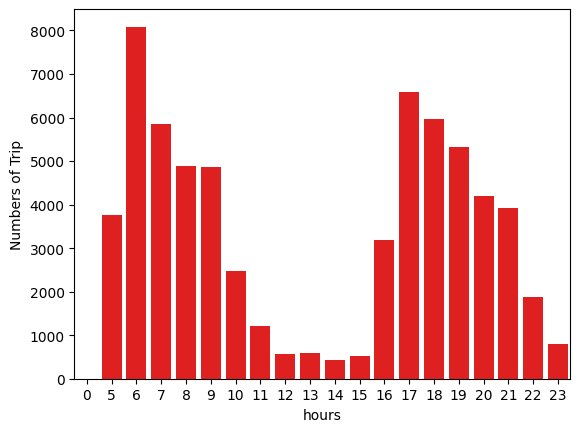

In [326]:
peakBar(count_hours)

Dari visualisasi di atas terlihat disini bahwa jam tersibuk ada pada jam 05.00-07.00  dan jam 17.00-19.00. Hal ini dikarenakan tingginya aktivitas masyarakat jakarta untuk pergi kerja atau sekolah pada jam 05.00-07.00 dan pulang kantor pada jam 17.00-19.00.

Sedangkan waktu terlowong ada di jam 12.00 - 15.00.

Insight:
- Perusahaan harus memastikan ketersediaan armada yang memadai pada jam-jam tersebut serta meningkatkan keamanan di halte dan di armada



#### 4. Siapa yang paling banyak menggunakan TransJakarta ? (Melihat Pengguna Berdasarkan Gender)

In [210]:
a = df.value_counts(['payCardSex']).to_dict()

In [211]:
a

{('F',): 17350, ('M',): 15205}

([<matplotlib.patches.Wedge at 0x1e742428550>,
 [Text(-0.11364405562139256, 1.0941138097208727, "('F',)"),
  Text(0.11364405562139217, -1.0941138097208727, "('M',)")],
 [Text(-0.06198766670257775, 0.5967893507568396, '53%'),
  Text(0.06198766670257754, -0.5967893507568396, '47%')])

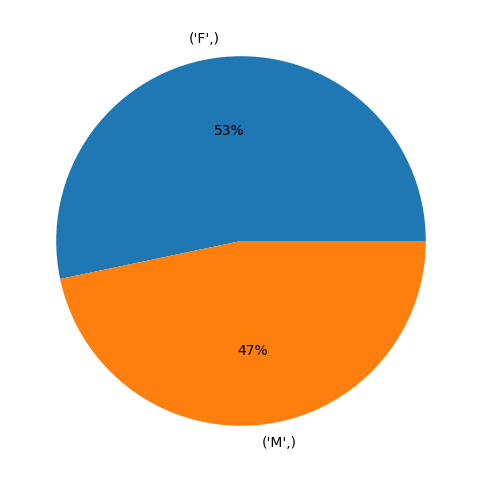

In [213]:
fig = plt.figure(figsize=(6,6))
ax = plt.axes()
ax.pie(a.values(), labels=a.keys(), autopct='%1.0f%%')

Dari visualisasi diatas terlihat disini bahwa kebanyakan penumpang adalah berjenis kelamin Perempuan (F) dibandingkan Laki-laki (L).

Insight:
- Perusahaan harus meningkatkan tingkat keamanan baik di halte maupun di dalam armada, bisa dengan menempatkan petugas keamanan di tiap-tiap armada yang beroperasi

# Kesimpulan 

Dari analisis yang telah dilakukan, kita bisa membuat kesimpulan berikut :
* Koridor Cibubur - Balai Kota menjadi koridor paling banyak transaksi yaitu sebanyak 371 transaksi disusul Ciputat - CSW sebanyak 355 transaksi kemudian Harmoni - Jakarta International Stadium sebanyak 318 transaksi.
* Sedangkan, Koridor Kampung Rambutan - Blok M menjadi koridor paling sedikit transaksi yaitu sebanyak 17 transaksi disusul Tanah Abang - Kebayoran Lama via Pos Pengumben 22 transaksi dan Term. Pulo Gadung - Lampiri 28 transaksi.
* Halte dengan Tap In dan Tap Out terbanyak ada pada Halte Penjaringan 452 total transaksi (213 Tap In & 244 Tap Out) dan Halte BKN dengan total transaksi 436 (152 Tap In dan 284 Tap Out)
* Jam tersibuk ada pada jam 05.00-07.00 dan jam 17.00-19.00, sedangkan waktu terlowong ada di jam 12.00 - 15.00.
* Mayoritas pengguna TransJakarta adalah Perempuan sebesar 53% (17.350 transaksi) dan Laki-laki 47% (15.205 transaksi).

# Rekomendasi 

* Mengoperasikan lebih banyak armada atau dilakukan penambahan armada pada koridor-koridor yang memiliki tingkat transaksi terbanyak.
* Mengalihkan sebagian armada pada koridor dengan intensitas transaksi yang tergolong rendah ke koridor-koridor yang memiliki intensitas transaksi tinggi.
* Melakukan peningkatan infrastruktur atau revitalisasi pada halte-halte dengan tingkat kepadatan yang tinggi guna menghindari antiran atau penumpukan penumpang serta tetap bisa menjaga kenyamanan pengguna.
* Meningkatkan tingkat keamanan baik pada halte maupun di dalam armada. Hal ini dikarenakan ada beberapa halte yang padat dan juga sesuai hasil analisa dilihat mayortitas pengguna berjenis kelamin perempuan.